<a href="https://colab.research.google.com/github/khanhlam16/projectcuoiki/blob/main/Project_cuoi_ki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Le Khanh Lam/nhac cu/train', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 500 images belonging to 10 classes.


In [ ]:
val_set = val_datagen.flow_from_directory('/content/drive/My Drive/Le Khanh Lam/nhac cu/validation', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 300 images belonging to 10 classes.


In [ ]:
training_set.class_indices

{'Sáo trúc': 0,
 'Song loan': 1,
 "Đàn T'rưng": 2,
 'Đàn bầu': 3,
 'Đàn cò': 4,
 'Đàn nguyệt': 5,
 'Đàn sến': 6,
 'Đàn tranh': 7,
 'Đàn tỳ bà': 8,
 'Đàn đáy': 9}

In [ ]:
val_set.class_indices

{'Sáo trúc': 0,
 'Song loan': 1,
 "Đàn T'rưng": 2,
 'Đàn bầu': 3,
 'Đàn cò': 4,
 'Đàn nguyệt': 5,
 'Đàn sến': 6,
 'Đàn tranh': 7,
 'Đàn tỳ bà': 8,
 'Đàn đáy': 9}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', padding='same',input_shape=(224,224,3))) 
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                    

In [ ]:
 model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:

history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=val_set)

Epoch 1/100
16/16 [==============================] - 202s 12s/step - loss: 2.5145 - accuracy: 0.0720 - val_loss: 2.3106 - val_accuracy: 0.1000
Epoch 2/100
16/16 [==============================] - 10s 644ms/step - loss: 2.3056 - accuracy: 0.1060 - val_loss: 2.2829 - val_accuracy: 0.2067
Epoch 3/100
16/16 [==============================] - 10s 644ms/step - loss: 2.1282 - accuracy: 0.2560 - val_loss: 1.9355 - val_accuracy: 0.3500
Epoch 4/100
16/16 [==============================] - 10s 663ms/step - loss: 1.8853 - accuracy: 0.3280 - val_loss: 1.6659 - val_accuracy: 0.4200
Epoch 5/100
16/16 [==============================] - 10s 643ms/step - loss: 1.6670 - accuracy: 0.4240 - val_loss: 1.4621 - val_accuracy: 0.4833
Epoch 6/100
16/16 [==============================] - 10s 638ms/step - loss: 1.6110 - accuracy: 0.4720 - val_loss: 1.2860 - val_accuracy: 0.5600
Epoch 7/100
16/16 [==============================] - 10s 650ms/step - loss: 1.4554 - accuracy: 0.5000 - val_loss: 1.1388 - val_accuracy: 

In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.003982867114245892
Train Accuracy 0.9980000257492065


<function matplotlib.pyplot.show(*args, **kw)>

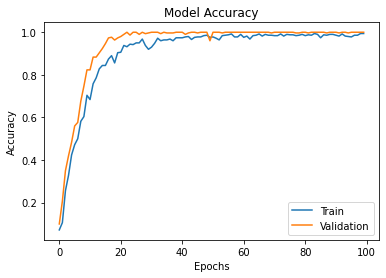

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("nhaccu.h5")

In [ ]:
 model_face=load_model('nhaccu.h5')

1/1 [==============================] - 0s 362ms/step
Dan Trung


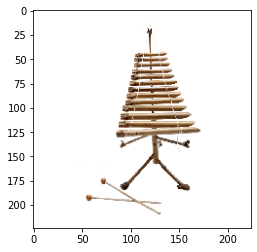

1/1 [==============================] - 0s 15ms/step
Dan Trung


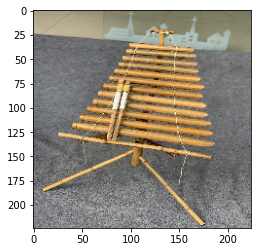

1/1 [==============================] - 0s 16ms/step
Dan Bau


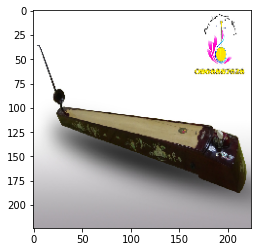

1/1 [==============================] - 0s 19ms/step
Dan Bau


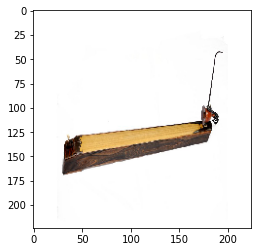

1/1 [==============================] - 0s 18ms/step
Dan co


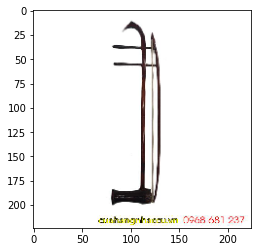

1/1 [==============================] - 0s 18ms/step
Dan co


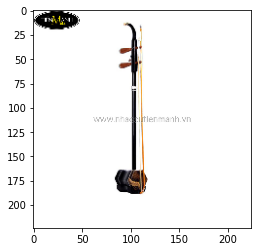

1/1 [==============================] - 0s 16ms/step
Dan day


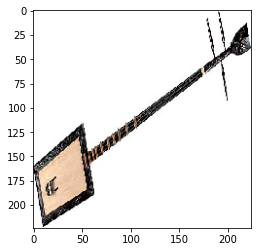

1/1 [==============================] - 0s 19ms/step
Dan day


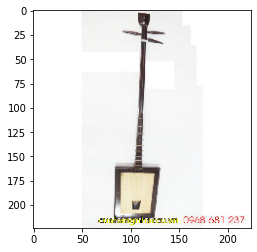

1/1 [==============================] - 0s 16ms/step
Dan nguyet


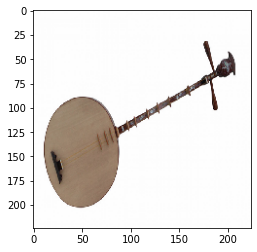

1/1 [==============================] - 0s 16ms/step
Dan nguyet


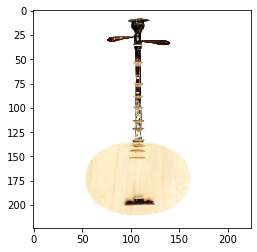

1/1 [==============================] - 0s 15ms/step
Dan sen


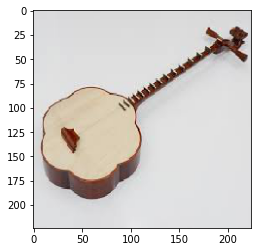

1/1 [==============================] - 0s 19ms/step
Dan sen


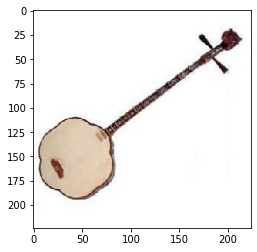

1/1 [==============================] - 0s 16ms/step
Dan ty ba


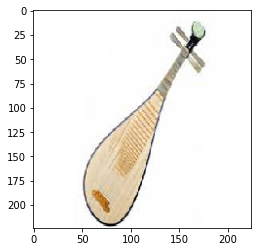

1/1 [==============================] - 0s 15ms/step
Dan tranh


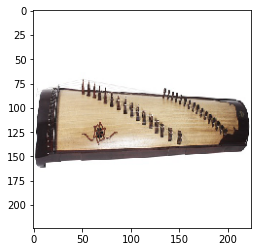

1/1 [==============================] - 0s 19ms/step
Dan tranh


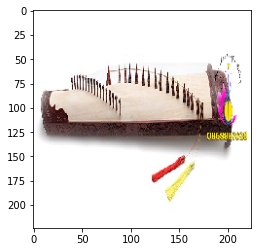

1/1 [==============================] - 0s 16ms/step
Sao truc


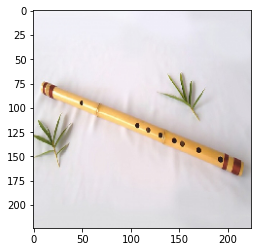

1/1 [==============================] - 0s 17ms/step
Song loan


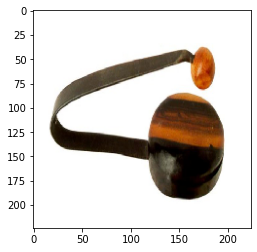

1/1 [==============================] - 0s 19ms/step
Dan co


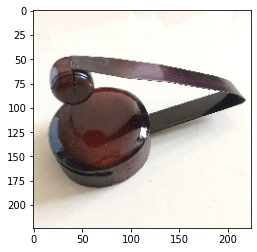

1/1 [==============================] - 0s 16ms/step
Dan ty ba


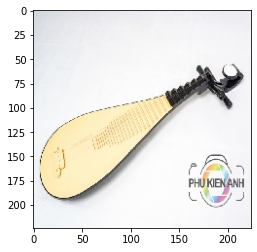

In [ ]:
import os
test = '/content/drive/My Drive/Le Khanh Lam/nhac cu/test/test1'

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(224,224))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_face.predict(img)
  if round(result[0][0])==1:
    prediction='Sao truc'
  if round(result[0][1])==1:
    prediction = 'Song loan'
  if round(result[0][2])==1:
    prediction='Dan Trung'
  if round(result[0][3])==1:
    prediction='Dan Bau'
  if round(result[0][4])==1:
    prediction='Dan co'
  if round(result[0][5])==1:
    prediction='Dan nguyet'
  if round(result[0][6])==1:
    prediction='Dan sen'
  if round(result[0][7])==1:
    prediction='Dan tranh'
  if round(result[0][8])==1:
    prediction='Dan ty ba'
  if round(result[0][9])==1:
    prediction='Dan day'
  
  print(prediction)
  plt.show()